</br>**Question 1: Canny Edge Detection Implementation [3 pts]<br/>**
_In 1986, John Canny defined a set of goals for an edge detector and described an optimal method for achieving
them. Canny specified three issues that an edge detector must address:<br/>
• Error rate: Desired edge detection filter should find all the edges, there should not be any missing edges,
and it should respond only to edge regions.<br/>
• Localization: Distance between detected edges and actual edges should be as small as possible.<br/>
• Response: The edge detector should not identify multiple edge pixels where only a single edge exists.<br/>
Remember from the lecture that in Canny edge detection, we will first smooth the images, then compute gradients,
magnitude, and orientation of the gradient. This procedure is followed by non-max suppression, and finally hysteresis thresholding is applied to finalize the steps. Briefly, follow the steps below for practical implementation of Canny_<br/>
**Edge detector :<br/>**
1. Read a gray scale image you can find from Berkeley Segmentation Dataset, Training images, store it as a
matrix named I.<br/>
2. Create a one-dimensional Gaussian mask G to convolve with I. The standard deviation(s) of this Gaussian is
a parameter to the edge detector (call it σ > 0).<br/>
3. Create a one-dimensional mask for the first derivative of the Gaussian in the x and y directions; call these G x
and G y . The same σ > 0 value is used as in step 2.<br/>
4. Convolve the image I with G along the rows to give the x component image (I x ), and down the columns to
give the y component image (I y ).<br/>
5. Convolve I x with G x to give I x 0 , the x component of I convolved with the derivative of the Gaussian, and
convolve I y with G y to give I y 0 , y component of I convolved with the derivative of the Gaussian.<br/>
6. Compute the magnitude of the edge response by combining
q the x and y components. The magnitude of the
result can be computed at each pixel (x, y) as: M(x, y) = I x 0 (x, y) 2 + I y 0 (x, y) 2 .<br/>
7. Implement non-maximum suppression algorithm that we discussed in the lecture. Pixels that are not local
maxima should be removed with this method. In other words, not all the pixels indicating strong magnitude
are edges in fact. We need to remove false-positive edge locations from the image.<br/>
8. Apply Hysteresis thresholding to obtain final edge-map.

In [20]:
from PIL import Image
from pylab import *
from copy import deepcopy
%matplotlib inline
import cv2
import numpy as num, math
import numpy as np 
from math import pi, sqrt, exp
from copy import deepcopy
import matplotlib.pyplot as plt
from numpy import matrix
import matplotlib.cm as cm
from matplotlib import pyplot

**Original Image**

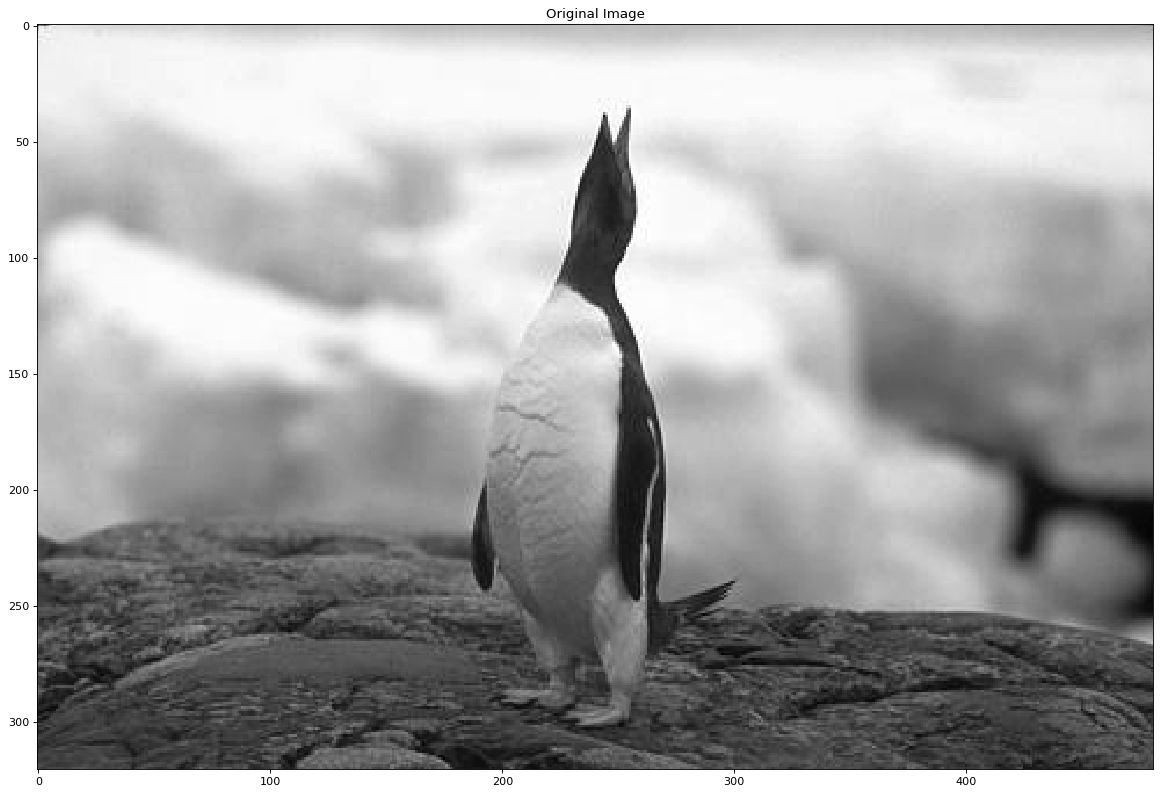

In [18]:
I = array(Image.open('/home/srikar/CVPA1/CVV/penguin.jpg'))
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Original Image')
imshow(I,cmap = cm.gray)

In [4]:
def Gaussian_Fn(n,sigma):
    size = range(-int(n/2),int(n/2)+1)
    return [1 / (sigma * sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2)) for x in size]

    

In [5]:
def Gaussian_Derrivative(n,sigma):
    size = range(-int(n/2),int(n/2)+1)
    return [-x / (sigma**3*sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2)) for x in size]


In [6]:
Gaussian_Fn(11,1)

[1.4867195147342977e-06,
 0.00013383022576488537,
 0.0044318484119380075,
 0.05399096651318806,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 0.0044318484119380075,
 0.00013383022576488537,
 1.4867195147342977e-06]

In [7]:
Gaussian_Derrivative(11,1)

[7.4335975736714894e-06,
 0.0005353209030595415,
 0.013295545235814022,
 0.10798193302637613,
 0.24197072451914337,
 0.0,
 -0.24197072451914337,
 -0.10798193302637613,
 -0.013295545235814022,
 -0.0005353209030595415,
 -7.4335975736714894e-06]

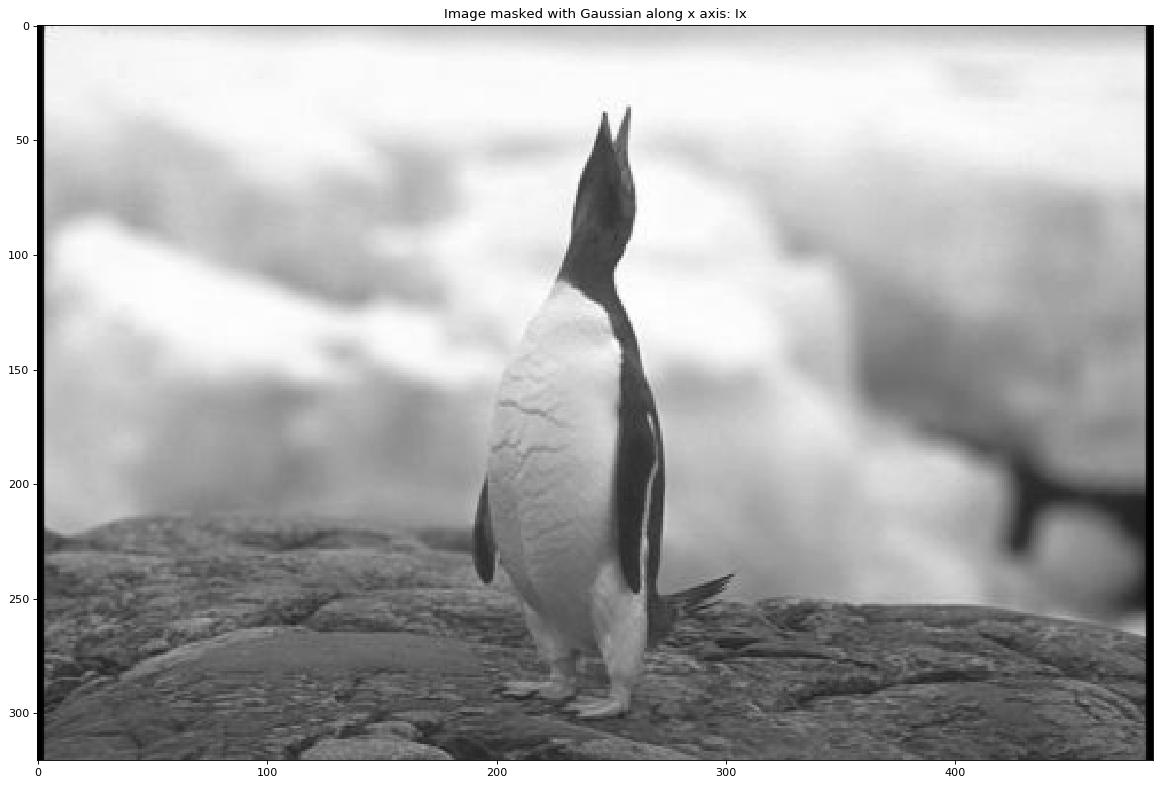

In [8]:
Ixg=[]
g = Gaussian_Fn(7,0.5)
for i in range(len(I[:,0])):
    x=np.convolve(I[i,:], g)
    Ixg.append(x)
    
Ixg =np.array(np.matrix(Ixg))

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Image masked with Gaussian along x axis: Ix')
plt.imshow(Ixg,cmap = cm.gray)


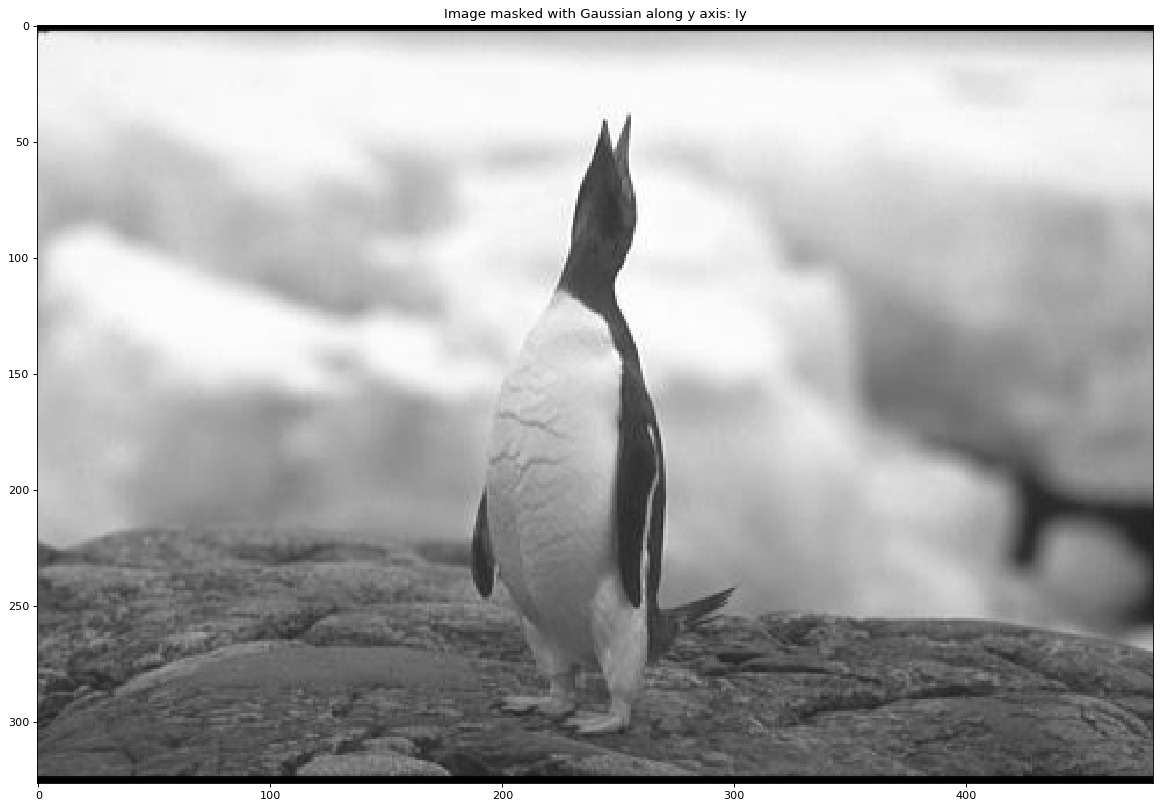

In [9]:
Iyt =[]
for i in range (len(I[0,:])):
    y = np.convolve(I[:,i], g)
    Iyt.append(y) 
Iyg = np.transpose(Iyt)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Image masked with Gaussian along y axis: Iy')
plt.imshow(Iyg,cmap = cm.gray)

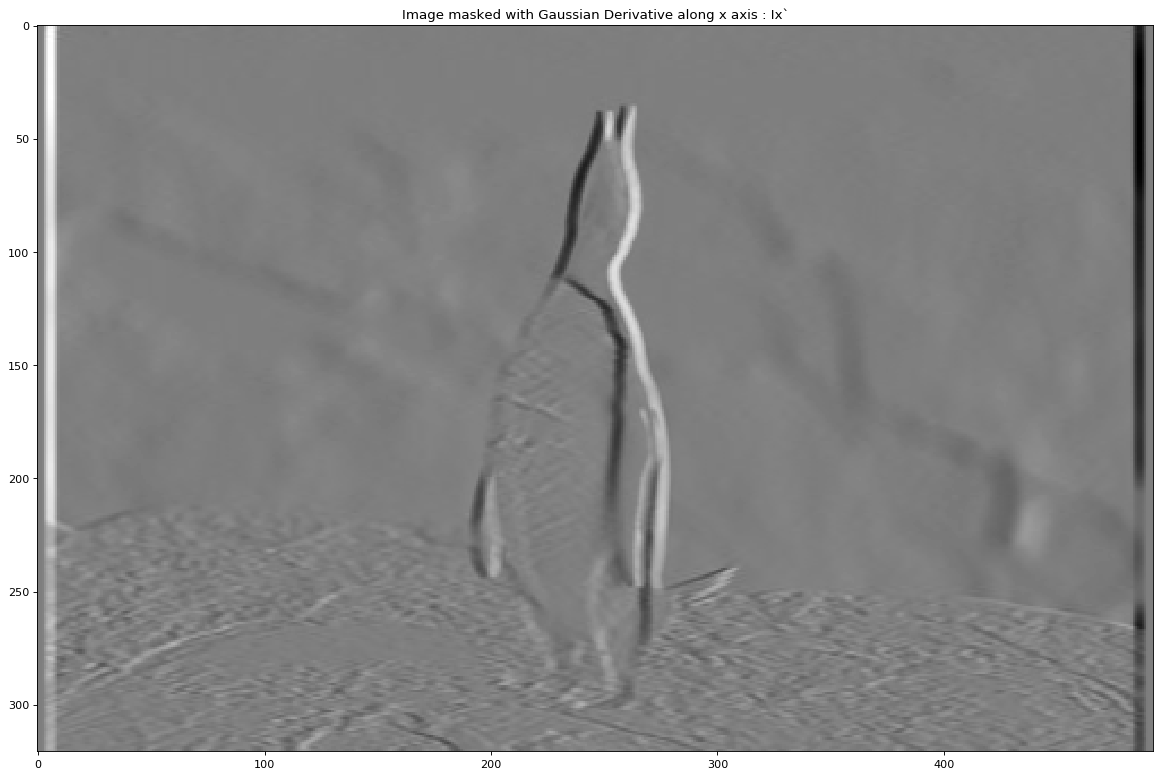

In [10]:
gd = Gaussian_Derrivative(7,8)
Ix_gd = []
for i in range(len(Ixg[:,0])):
    x = np.convolve(Ixg[i,:],gd)
    Ix_gd.append(x)
    
    
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')    
plt.title('Image masked with Gaussian Derivative along x axis : Ix`')
plt.imshow(Ix_gd,cmap = cm.gray)



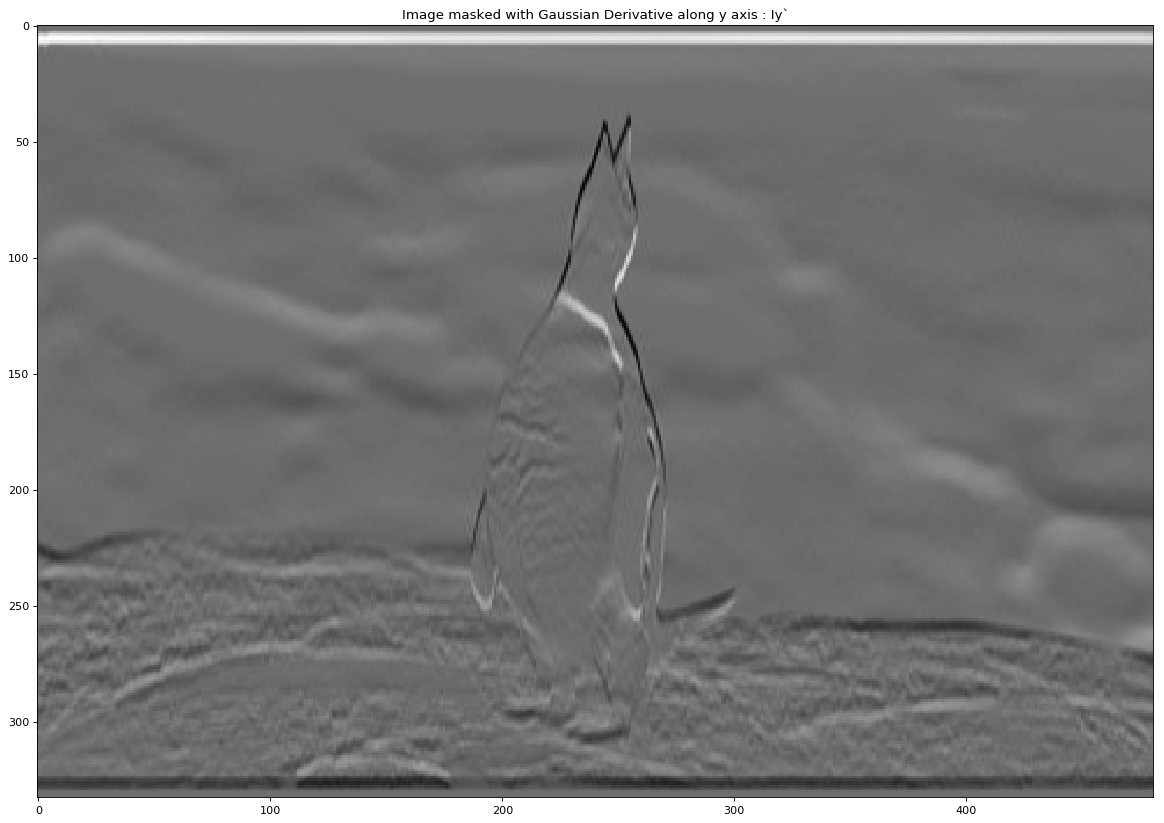

In [11]:
IygdT=[]
for i in range (len(Iyg[0,:])):
    y = np.convolve(Iyg[:,i], gd)
    IygdT.append(y) 
Iy_gd= np.transpose(IygdT)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Image masked with Gaussian Derivative along y axis : Iy`')
plt.imshow(Iy_gd,cmap = cm.gray)



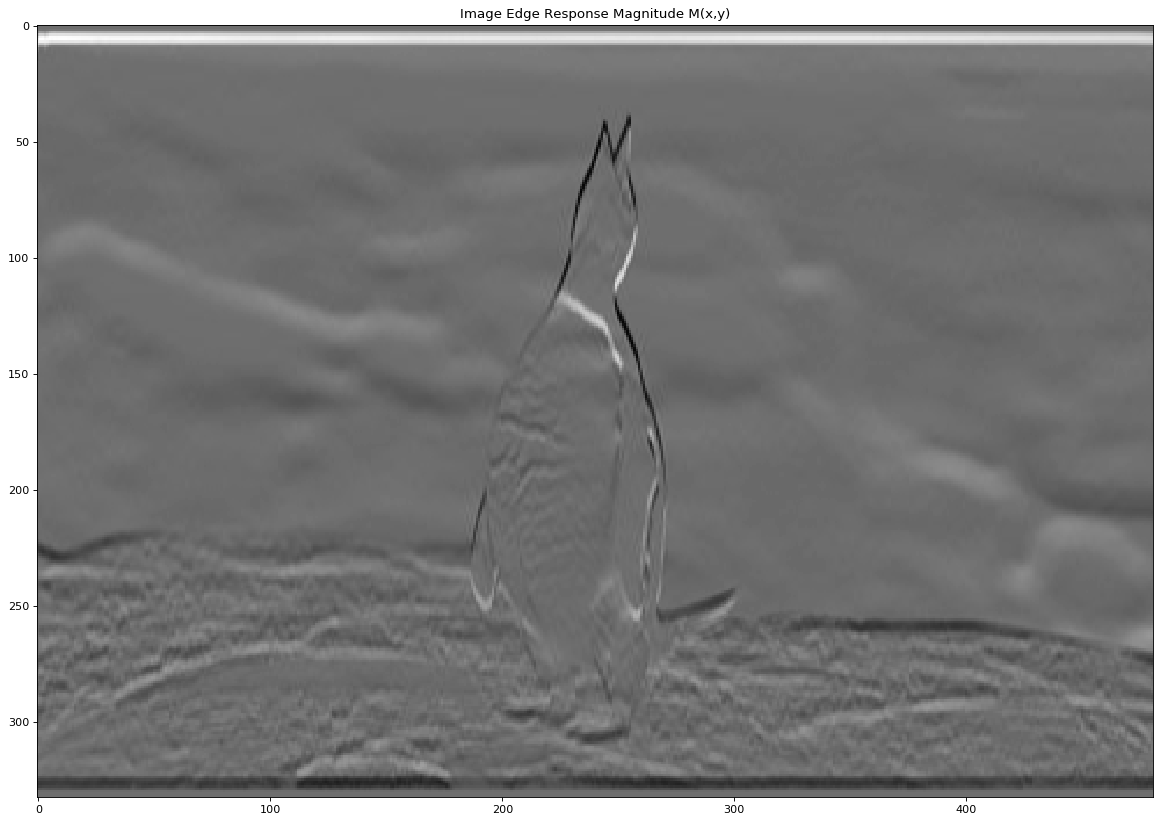

In [12]:
Ix_gdsq= np.square(Ix_gd)
Iy_gdsq= np.square(Iy_gd)

Magxy =[]
for i in  range (len(Ix_gdsq)):
    temp = []
    for j in range (len(Iy_gdsq[0,:])):
        temp.append(sqrt(Ix_gdsq[i,j] + Iy_gdsq[i,j]))
        if(j == len(Iy_gdsq[0,:])-1):
            Magxy.append(temp)
Magxy = np.array(np.matrix(Magxy))
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Image Edge Response Magnitude M(x,y)')
plt.imshow(Iy_gd,cmap = cm.gray)



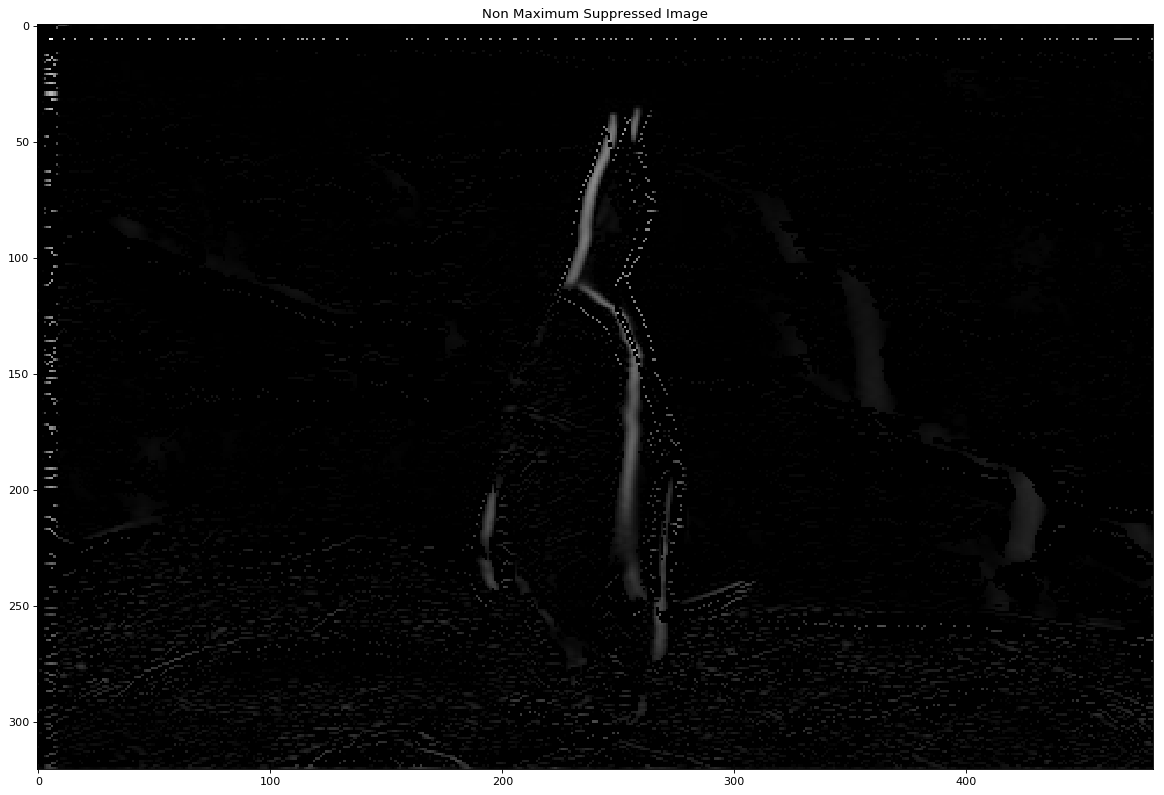

In [13]:
A= np.array(np.matrix(Ix_gd))
B= np.array(np.matrix(Iy_gd))
AngleDeg =[]
for i in range(len(Ix_gd)):
    temp=[]
    for j in range(len(Iy_gd[0,:])):
        temp.append((math.atan2(B[i,j],A[i,j]))*180/pi)
        if(j == len(Iy_gd[0,:])-1):
            AngleDeg.append(temp)
            
Angle= np.array(np.matrix(AngleDeg))
Magxy_Temp = Magxy 
NonMax  = deepcopy(Magxy)
for i in range(len(Angle[:,0])):
    for j in range(len(Angle[0,:])):
        try:
            #Horizontal Edge
            if ((-22.5< Angle[i,j] <= 22.5) | ( -157.5 < Angle[i,j] <= 157.5)):
                if((Magxy_Temp[i,j] < Magxy_Temp[i+1,j]) | (Magxy_Temp[i, j] < Magxy_Temp[i-1,j])):
                    NonMax[i,j] = 0
                    
                
            #Vertical Edge
            if ((-112.5 < Angle[i,j] <= -67.5) | ( 67.5 < Angle[i,j] <= 112.5)):
                if((Magxy_Temp[i,j] < Magxy_Temp[i,j+1]) | (Magxy_Temp[i, j] < Magxy_Temp[i,j-1])):
                    NonMax[i,j] = 0

                    
            #+45 Degree Edge
            
            if ((-67.5 < Angle[i,j] <= -22.5) | ( 112.5 < Angle[i,j] <= 157.5)):
                if((Magxy_Temp[i,j] < Magxy_Temp[i+1,j+1]) | (Magxy_Temp[i, j] < Magxy_Temp[i+1,j+1])):
                    NonMax[i,j] = 0
                    

            #-45 degree Edge
            
            if ((-157.5 < Angle[i,j] <= -112.5) | (22.5 < Angle[i,j] <= 67.5 )):
                if((Magxy_Temp[i,j] < Magxy_Temp[i-1,j-1]) | (Magxy_Temp[i, j] < Magxy_Temp[i+1,j+1])):
                    NonMax[i,j] = 0
                    
            

        except IndexError:
                pass
            
            
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')            
plt.title('Non Maximum Suppressed Image')
plt.imshow(NonMax,cmap = cm.gray)


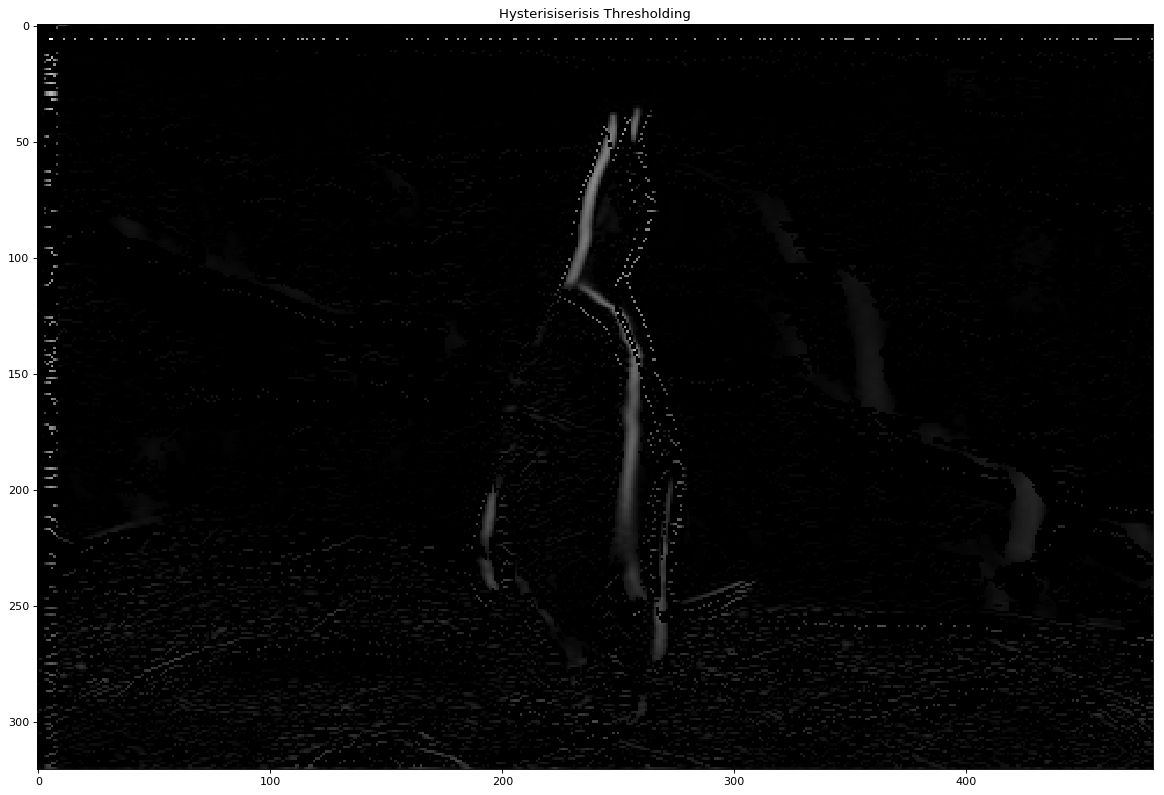

In [14]:
NonMax =(matrix(NonMax))
Hysterisis = deepcopy(NonMax)
u = v = 0
highT = 4.5 # The Non Maximum suppression matrix was checked for several points of 
lowT = 1.5  #thresholds to suppress the non edge points
maxm = 255 # we would be using this to set the pixel in order to make it a edge in the following for loops

for i in range(len(Hysterisis[:,0])-1):
    
    for j in range(len(Hysterisis[0,:])-1):
        
        u = i
        v = j
        while((u!=0)&(v!=0)):
            
            if (Hysterisis[u,v] >=highT):
                
                Hysterisis[u,v] = maxm
                try:
                    
                    if (lowT<=Hysterisis[u+1,v] < highT):
                        
                        Hysterisis[u+1,v] = maxm
                        u = u+1
                        v = v
                    elif (lowT<=Hysterisis[u-1,v]<highT):
                        
                        Hysterisis[u-1,v] = maxm
                        u = u-1
                        v= v
                    elif (lowT<=Hysterisis[u+1,v+1]<highT):
                        
                                Hysterisis[u+1,y+1] = maxm
                                u = u+1
                                v = v+1
                    elif (lowT<=Hysterisis[u-1,v-1]<highT):
                                                
                        Hysterisis[u-1,v-1] = maxm
                        u = u-1
                        v = v-1
                    elif (lowT<=Hysterisis[u,v+1]<highT):
                                                                       
                        Hysterisis[u,v+1] = maxm
                        u = u
                        v = v+1

                    elif (lowT<=Hysterisis[u,v-1]<highT):
                        
                        Hysterisis[u,v-1] = maxm
                        u = u
                        v = v-1
                    elif (lowT<=Hysterisis[u-1,v+1]<highT):
                        
                        Hysterisis[u-1,v+1] = maxm
                        u = u-1
                        v = v+1
                    elif (lowT<=Hysterisis[u+1,v-1]<highT):
                        
                        Hysterisis[u+1,v-1] = maxm
                        u = u+1
                        v = v-1
                    else: 
                        
                        u = 0
                        v = 0


                except IndexError: 
                    
                    u = 0
                    v = 0

            elif (lowT<= Hysterisis[u,v]<highT):
                
                Hysterisis[u,v] = maxm

            else:
                Hysterisis[u,v] = 0
                u = 0
                v = 0 
                
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Hysterisiserisis Thresholding')
plt.imshow(Hysterisis,cmap = cm.gray)


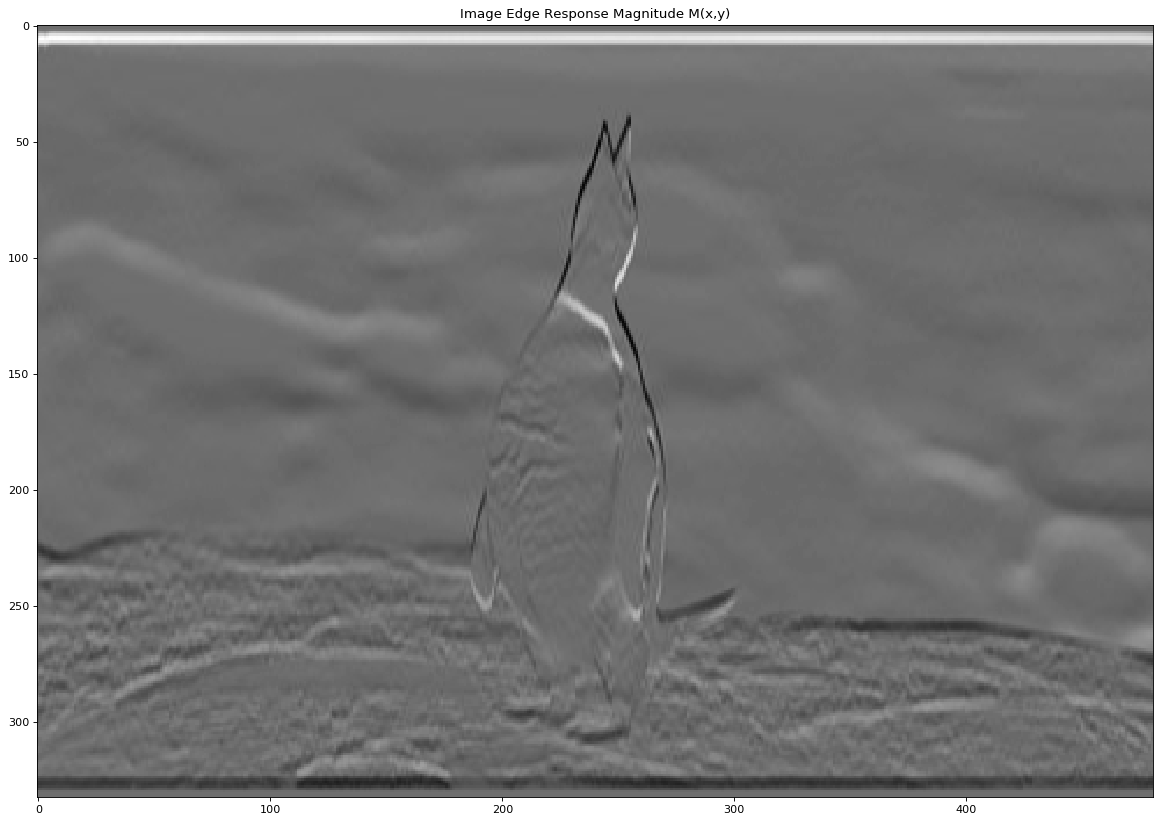

In [15]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Image Edge Response Magnitude M(x,y)')
plt.imshow(Iy_gd,cmap = cm.gray)


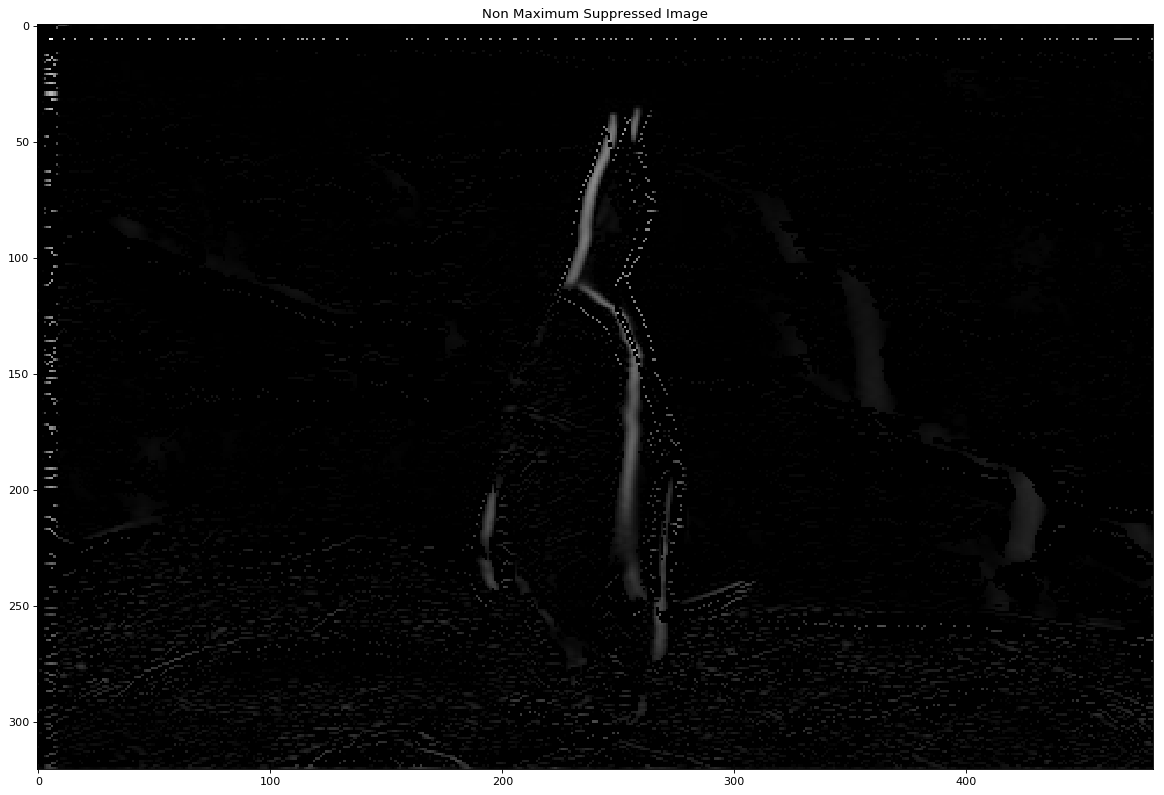

In [16]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')            
plt.title('Non Maximum Suppressed Image')
plt.imshow(NonMax,cmap = cm.gray)

**Combined**

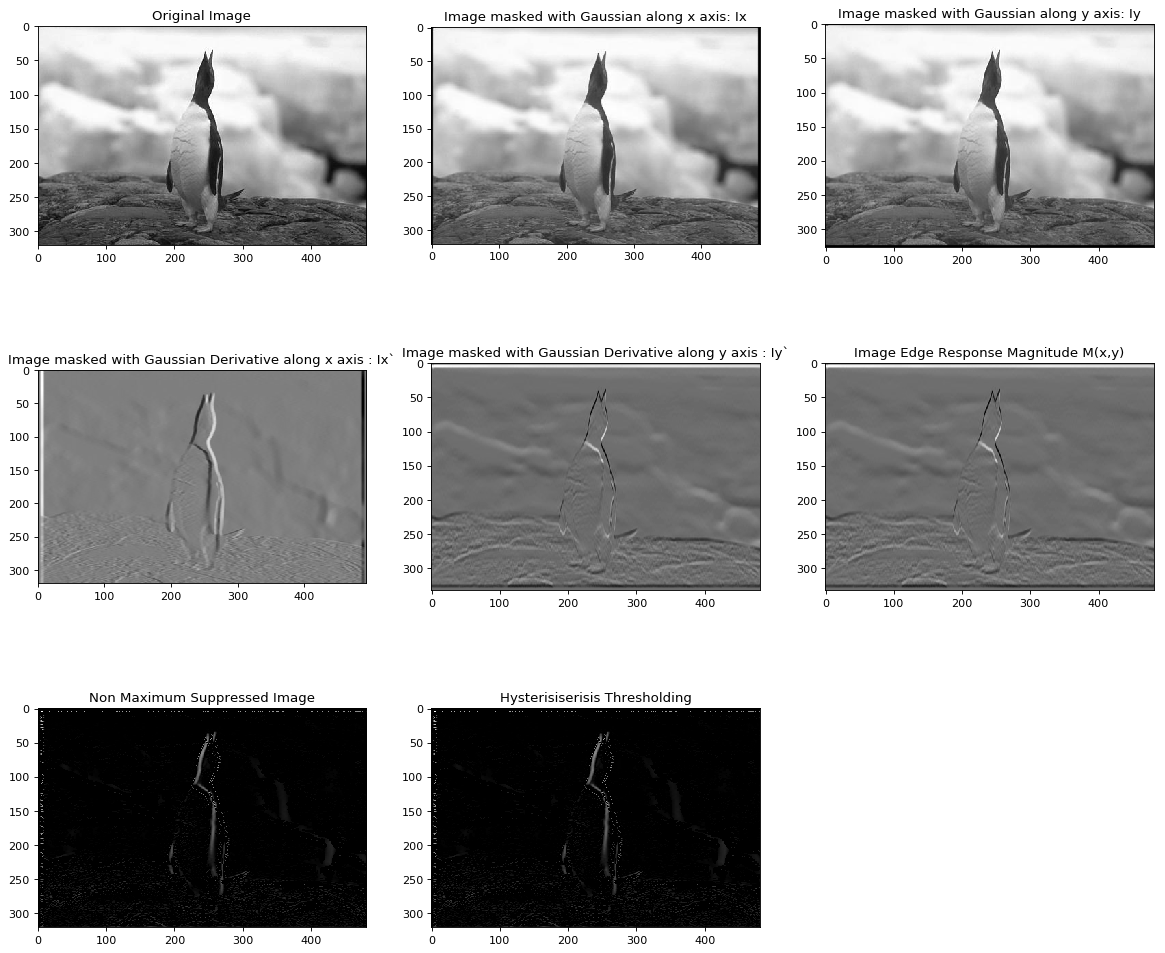

In [26]:
plt.figure()
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


plt.subplot(3,3,1)
plt.title('Original Image')
imshow(I,cmap = cm.gray)

plt.subplot(3,3,2)
plt.title('Image masked with Gaussian along x axis: Ix')
plt.imshow(Ixg,cmap = cm.gray)


plt.subplot(3,3,3)
plt.title('Image masked with Gaussian along y axis: Iy')
plt.imshow(Iyg,cmap = cm.gray)

plt.subplot(3,3,4)
plt.title('Image masked with Gaussian Derivative along x axis : Ix`')
plt.imshow(Ix_gd,cmap = cm.gray)

plt.subplot(3,3,5)
plt.title('Image masked with Gaussian Derivative along y axis : Iy`')
plt.imshow(Iy_gd,cmap = cm.gray)


plt.subplot(3,3,6)
plt.title('Image Edge Response Magnitude M(x,y)')
plt.imshow(Iy_gd,cmap = cm.gray)

plt.subplot(3,3,7)
plt.title('Non Maximum Suppressed Image')
plt.imshow(NonMax,cmap = cm.gray)


plt.subplot(3,3,8)
plt.title('Hysterisiserisis Thresholding')
plt.imshow(Hysterisis,cmap = cm.gray)




pyplot.show()